In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import defaultdict
import math
import matplotlib.pyplot as plt

In [38]:
# load in Kuzmin et al data
kuzmin_et_al_data_dir = "/Users/bjarnold/Princeton_DataX/Epistasis/yeast_screens/KuzminEtAl2018/data_files"
kuzmin_s1 = pd.read_csv(f"{kuzmin_et_al_data_dir}/Data File S1_Raw genetic interaction dataset.tsv", sep="\t")
kuzmin_s2 = pd.read_csv(f"{kuzmin_et_al_data_dir}/Data File S2_Digenic and adjusted trigenic interaction dataset OpenedExportedFromExcel.txt", sep="\t")

kuzmin_s1 = kuzmin_s1.rename(columns = {"Query strain ID" : "query_strain_id",
                        "Query allele name": "query_allele_name",
                        "Array strain ID": "array_strain_id",
                        "Array allele name": "array_allele_name",
                        "Combined mutant type": "combined_mutant_type",
                        "Raw genetic interaction score (epsilon)": "raw_interaction_score_epsilon",
                        "Adjusted genetic interaction score (epsilon or tau)": "adjusted_interaction_score_epsilon_or_tau",
                        "P-value": "pval",
                        "Query single/double mutant fitness": "query_single_double_mutant_fitness",
                        "Array single mutant fitness": "array_single_mutant_fitness",
                        "Combined mutant fitness": "combined_mutant_fitness",
                        "Combined mutant fitness standard deviation": "combined_mutant_fitness_std"})

significant_trigenic = []
for i,row in kuzmin_s2.iterrows():
    if row['Combined mutant type'] == "trigenic":
        query_alleles = row['Query allele name'].split('+')
        array_allele = row['Array allele name']
        alleles = query_alleles + [array_allele]
        x = [ a.replace("_", "Δ") for a in alleles]
        significant_trigenic.append(tuple(x))

print(significant_trigenic[0:5])
print(len(significant_trigenic))
#for i in significant_trigenic:
#    if "hoΔ" in i:
#        print(i)

[('swd1Δ', 'shg1Δ', 'elo2Δ'), ('swd1Δ', 'shg1Δ', 'apc11-13'), ('swd1Δ', 'shg1Δ', 'get2Δ'), ('swd1Δ', 'shg1Δ', 'swi4Δ'), ('swd1Δ', 'shg1Δ', 'elp3Δ')]
0.0
3196


In [4]:
costanzo_et_al_data_dir = "/Users/bjarnold/Princeton_DataX/Epistasis/yeast_screens/CostanzoEtAl2016/data_files/Data File S1. Raw genetic interaction datasets: Pair-wise interaction format"

costanzo_nxn = pd.read_csv(f"{costanzo_et_al_data_dir}/SGA_NxN.txt", sep="\t")
costanzo_exn = pd.read_csv(f"{costanzo_et_al_data_dir}/SGA_ExN.txt", sep="\t")
costanzo_exe = pd.read_csv(f"{costanzo_et_al_data_dir}/SGA_ExE.txt", sep="\t")


costanzo_data_column_rename = {"Query Strain ID" : "query_strain_id",
                        "Query allele name": "query_allele_name",
                        "Array Strain ID": "array_strain_id",
                        "Array allele name": "array_allele_name",
                        "Arraytype/Temp" : "Arraytype_Temp",
                        "Genetic interaction score (ε)" : "genetic_interaction_e",
                        "P-value": "pval",
                        "Query single mutant fitness (SMF)": "query_smf",
                        "Array SMF": "array_smf",
                        "Double mutant fitness": "dbl_mutant_fitness",
                        "Double mutant fitness standard deviation": "dbl_mutant_fitness_std"}

costanzo_nxn = costanzo_nxn.rename(columns = costanzo_data_column_rename)
costanzo_exn = costanzo_exn.rename(columns = costanzo_data_column_rename)
costanzo_exe = costanzo_exe.rename(columns = costanzo_data_column_rename)
costanzo = pd.concat([costanzo_nxn, costanzo_exn, costanzo_exe])

costanzo = costanzo.astype({'query_strain_id': 'str',
                    'query_allele_name': 'str',
                    'array_strain_id': 'str',
                    'array_allele_name': 'str',
                    'Arraytype_Temp': 'str'})

costanzo = costanzo[['query_allele_name', 'array_allele_name', 'query_smf', 'array_smf']]

In [5]:
kuzmin_s1.head()
#kuzmin_s2.head(n=20)
#kuzmin_s2['Combined mutant type'].value_counts()
#sns.histplot(kuzmin_s2['Adjusted genetic interaction score (epsilon or tau)'])
#np.max(kuzmin_s2[kuzmin_s2['Adjusted genetic interaction score (epsilon or tau)'] < 0]['Adjusted genetic interaction score (epsilon or tau)'])

,query_strain_id,query_allele_name,array_strain_id,array_allele_name,combined_mutant_type,raw_interaction_score_epsilon,adjusted_interaction_score_epsilon_or_tau,pval,query_single_double_mutant_fitness,array_single_mutant_fitness,combined_mutant_fitness,combined_mutant_fitness_std
0,YAR002W+YDL227C_tm3180,nup60Δ+hoΔ,YAL048C_dma5203,gem1Δ,digenic,-0.008680,-0.008680,0.4395,0.9528,0.8595,0.8103,0.0463
1,YAR002W+YDL227C_tm3180,nup60Δ+hoΔ,YAL051W_dma39,oaf1Δ,digenic,-0.012815,-0.012815,0.4194,0.9528,0.9665,0.9081,0.0488
2,YAR002W+YDL227C_tm3180,nup60Δ+hoΔ,YAL053W_dma38,flc2Δ,digenic,-0.045327,-0.045327,0.2665,0.9528,0.9675,0.8765,0.0562
3,YAR002W+YDL227C_tm3180,nup60Δ+hoΔ,YAL054C_dma37,acs1Δ,digenic,-0.022210,-0.022210,0.3703,0.9528,0.9875,0.9187,0.0587
4,YAR002W+YDL227C_tm3180,nup60Δ+hoΔ,YAL055W_dma59,pex22Δ,digenic,-0.029287,-0.029287,0.3358,0.9528,0.8713,0.8009,0.0553


In [6]:
kuzmin_s2.head(n=20)


,Query strain ID,Query allele name,Array strain ID,Array allele name,Combined mutant type,Adjusted genetic interaction score (epsilon or tau),P-value,"Digenic, Modified trigenic, or Novel trigenic"
0,YAR003W+YBR258C_tm2656,swd1_+shg1_,YCR034W_dma556,elo2_,trigenic,-0.080515,1.320000e-05,Modified_A-
1,YAR003W+YBR258C_tm2656,swd1_+shg1_,YDL008W_tsa783,apc11-13,trigenic,-0.110982,1.680000e-02,Modified_A-
2,YAR003W+YBR258C_tm2656,swd1_+shg1_,YER083C_dma1389,get2_,trigenic,-0.098060,2.680000e-08,Modified_A-
3,YAR003W+YBR258C_tm2656,swd1_+shg1_,YER111C_dma1394,swi4_,trigenic,-0.133171,1.230000e-09,Modified_A-
4,YAR003W+YBR258C_tm2656,swd1_+shg1_,YPL086C_dma4832,elp3_,trigenic,-0.080634,4.650000e-02,Modified_A-
5,YBR043C+YMR026C_tm2551,qdr3_+pex12_,YHL023C_dma2062,npr3_,trigenic,-0.318951,3.530000e-43,Modified_A-
6,YBR043C+YMR026C_tm2551,qdr3_+pex12_,YNL006W_tsa466,lst8-6,trigenic,-0.139719,7.560000e-13,Modified_A-
7,YBR070C+YHR188C_tm2645,ALG14-ph+GPI16-PH,YDR016C_tsa1077,DAD1-ph,trigenic,-0.209937,2.520000e-05,Modified_A-
8,YBR070C+YHR188C_tm2645,ALG14-ph+GPI16-PH,YDR437W_tsa1014,GPI19-2,trigenic,-0.104187,3.640000e-13,Modified_A-
9,YBR070C+YHR188C_tm2645,ALG14-ph+GPI16-PH,YGL005C_dma1587,cog7_,trigenic,-0.202634,6.150000e-05,Modified_A-


In [7]:
costanzo.head()
#print(len(costanzo))

,query_allele_name,array_allele_name,query_smf,array_smf
0,vps8,ecm15,0.7552,1.0112
1,vps8,hta2,0.7552,1.0005
2,vps8,pdr3,0.7552,1.0248
3,vps8,sla1,0.7552,0.8230
4,vps8,hir1,0.7552,0.9370


In [8]:
print(len(kuzmin_s1[kuzmin_s1['combined_mutant_type'] == "digenic"]))
print(np.sum(kuzmin_s1[kuzmin_s1['combined_mutant_type'] == "digenic"].raw_interaction_score_epsilon == kuzmin_s1[kuzmin_s1['combined_mutant_type'] == "digenic"].adjusted_interaction_score_epsilon_or_tau))

410399
410399


In the Kuzmin et al dataset, the hoΔ deletion has a negligible effect on fitness. The Kuzmin et al Supplement says they tested 410,399 double mutants and 195,666 triple mutants for fitness defects. In there S1 data table, I find this many double mutants (ho_delta mutation has "negligible" fitness defect, but could it have non-negligible interaction effects?) but I find less than half of the reported triple mutants. 

In [9]:
x = np.sum( [1 for i,row in kuzmin_s1.iterrows() if "hoΔ" in row['query_allele_name']] )
#np.sum( [1 for i,row in kuzmin.iterrows() if "hoΔ" not in row['query_allele_name']] )
print("double mutants with \"hoΔ\":", x)
print("double mutants without \"hoΔ\":",len(kuzmin_s1) - x)
kuzmin_s1["combined_mutant_type"].value_counts()

print(len(kuzmin_s1))
print(410399+91111)

double mutants with "hoΔ": 410399
double mutants without "hoΔ": 91111
501510
501510


In [10]:
# single (SMF), double (DMF), and triple (TMF) mutant fitness
# there are two SMF dictionaries, because for some mutations there are multiple estimates of single mutant fitness, and I wanted to see if it differs depending of whether it's a query or array allele
SMF_query = defaultdict(set)
SMF_array = defaultdict(set)

DMF_epsilon = {}
DMF_total = {}

TMF_total = {} # total fitness of the triple mutant
TMF_fij = {} # fitness of the query double mutant
TMF_fk = {} # fitness of the array single mutant
TMF_raw_epsilon = {}
TMF_adj_epsilon_tau = {}
for i,row in kuzmin_s1.iterrows():
    query_alleles = row['query_allele_name'].split('+')
    array_allele = row['array_allele_name']

    if row['combined_mutant_type'] == 'digenic':
        # extract query allele, then add query and array allele fitness to SMF
        assert "hoΔ" in query_alleles
        query_allele = [i for i in query_alleles if i != "hoΔ"]
        assert len(query_allele) == 1
        query_allele = query_allele[0]

        SMF_query[query_allele].add(row['query_single_double_mutant_fitness'])
        SMF_array[array_allele].add(row['array_single_mutant_fitness'])
        
        # for row['combined_mutant_type'] == 'digenic', raw_interaction_score_epsilon == adjusted_interaction_score_epsilon_or_tau
        DMF_epsilon[ (query_allele, array_allele) ] = row['raw_interaction_score_epsilon']

        DMF_total[ (query_allele, array_allele) ] = row['combined_mutant_fitness']

    if row['combined_mutant_type'] == 'trigenic':
        TMF_total[tuple(query_alleles + [array_allele])] = row['combined_mutant_fitness']
        TMF_fij[tuple(query_alleles)] = row['query_single_double_mutant_fitness']
        TMF_fk[array_allele] = row['array_single_mutant_fitness']
        TMF_raw_epsilon[tuple(query_alleles + [array_allele])] = row['raw_interaction_score_epsilon']
        TMF_adj_epsilon_tau[tuple(query_alleles + [array_allele])] = row['adjusted_interaction_score_epsilon_or_tau']



          

In [11]:
# WARNING: THIS TAKES ~30 MIN TO RUN!!

q = {i : 1 for i in list(costanzo.query_allele_name)}
a = {i : 1 for i in list(costanzo.array_allele_name)}

SMF_costanzo_tmp = defaultdict(list)
#SMF_costanzo_tmp = defaultdict(float)

for i,row in costanzo.iterrows():
    # add "Δ" so names agree with Kuzmin et al
    query_allele = row['query_allele_name'] + "Δ"
    array_allele = row['array_allele_name'] + "Δ"

    #SMF_costanzo_tmp[query_allele] = row['query_smf']
    #SMF_costanzo_tmp[array_allele] = row['array_smf']

    SMF_costanzo_tmp[query_allele].append(row['query_smf'])
    SMF_costanzo_tmp[array_allele].append(row['array_smf'])

SMF_costanzo = {}
for allele in SMF_costanzo_tmp:
    x = list(set(SMF_costanzo_tmp[allele]))
    #assert len(x) == 1

"""
for i,query in enumerate(TMF_total):
    i_allele = query[0]
    j_allele = query[1]
    i_allele_costanzo = query[0].strip("Δ")
    j_allele_costanzo = query[1].strip("Δ")

    if i_allele_costanzo in q:
        SMF_costanzo[i_allele] = list(set(costanzo['query_smf'][costanzo['query_allele_name'] == i_allele_costanzo]))
    elif i_allele_costanzo in a:
        SMF_costanzo[i_allele] = list(set(costanzo['array_smf'][costanzo['array_allele_name'] == i_allele_costanzo]))
    assert len(SMF_costanzo[i_allele]) == 1

    if j_allele_costanzo in q:
        SMF_costanzo[j_allele] = list(set(costanzo['query_smf'][costanzo['query_allele_name'] == j_allele_costanzo]))
    elif j_allele_costanzo in a:
        SMF_costanzo[j_allele] = list(set(costanzo['array_smf'][costanzo['array_allele_name'] == j_allele_costanzo]))
    assert len(SMF_costanzo[j_allele]) == 1
"""

'\nfor i,query in enumerate(TMF_total):\n    i_allele = query[0]\n    j_allele = query[1]\n    i_allele_costanzo = query[0].strip("Δ")\n    j_allele_costanzo = query[1].strip("Δ")\n\n    if i_allele_costanzo in q:\n        SMF_costanzo[i_allele] = list(set(costanzo[\'query_smf\'][costanzo[\'query_allele_name\'] == i_allele_costanzo]))\n    elif i_allele_costanzo in a:\n        SMF_costanzo[i_allele] = list(set(costanzo[\'array_smf\'][costanzo[\'array_allele_name\'] == i_allele_costanzo]))\n    assert len(SMF_costanzo[i_allele]) == 1\n\n    if j_allele_costanzo in q:\n        SMF_costanzo[j_allele] = list(set(costanzo[\'query_smf\'][costanzo[\'query_allele_name\'] == j_allele_costanzo]))\n    elif j_allele_costanzo in a:\n        SMF_costanzo[j_allele] = list(set(costanzo[\'array_smf\'][costanzo[\'array_allele_name\'] == j_allele_costanzo]))\n    assert len(SMF_costanzo[j_allele]) == 1\n'

<AxesSubplot:ylabel='Count'>

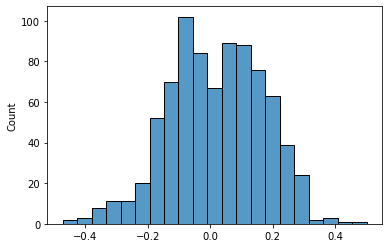

In [12]:
SMF_costanzo_single = {}
diffs_bt_doubles = []
for allele in SMF_costanzo_tmp:
    x = list(set(SMF_costanzo_tmp[allele]))
    if len(x) == 1 and not math.isnan(x[0]):
         SMF_costanzo_single[allele] = x[0]
    if len(x) == 2 and not math.isnan(x[0]):
        diffs_bt_doubles.append(x[0]-x[1])
sns.histplot(diffs_bt_doubles)


In [13]:
print(len(SMF_costanzo_tmp))
print(len(SMF_costanzo_single))

5647
4441


In [14]:
# for single mutant fitnesses in Kuzmin et al data, some entries have multiple, different values
# here we collect those mutations that have a single value
SMF_query_single = {}
SMF_array_single = {}

x = defaultdict(int)
for i in SMF_array:
    if len(SMF_array[i]) == 1:
       SMF_array_single[i] = float(list(SMF_array[i])[0])
    x[len(SMF_array[i])] += 1
print("array", x)

x = defaultdict(int)
for i in SMF_query:
    if len(SMF_query[i]) == 1:
       SMF_query_single[i] = float(list(SMF_query[i])[0])
    x[len(SMF_query[i])] += 1
print("query", x)

both = 0
for i in SMF_query_single:
    if i in SMF_array_single:
        both +=1
        #print(SMF_query_single[i], SMF_array_single[i])
print("single mutants measured as both query and array:", both)

array defaultdict(<class 'int'>, {1: 1181})
query defaultdict(<class 'int'>, {1: 351, 2: 5, 1114: 1, 1117: 1, 1122: 1})
single mutants measured as both query and array: 128


Consider three genes i, j, and k. Based on the experimental design of Kuzmin et al, they compute digenic interaction effects between genes i and k (e_ik) and between genes j and k (e_jk). Then, they cross the double mutant ij with single mutant k. This cross introduces 3 interaction effects: 2 digenic (e_ik and e_jk) and 1 trigenic (t_ijk). They compute the trigenic effect by subtracting out the two previously calculated digenic effects. Note that e_ij isn't calculated here and is irrelevant.

For each triple mutant ijk, let's confirm that double mutants ik and jk exist:

In [15]:
sum=0
for query in TMF_total:
    if (query[::2] in DMF_epsilon) and (query[1:3] in DMF_epsilon):
        sum += 1
print("Total number of triple mutants ijk:", len(TMF_total))
print("Number of triple mutants ijk in which double mutants ik and jk exist:", sum)

Total number of triple mutants ijk: 91111
Number of triple mutants ijk in which double mutants ik and jk exist: 91111


In there calculation of trigenic effects t_ijk, they use single mutant fitnesses for mutation i and j from the previous Costanzo study. Let's confirm that these exist:

In [16]:
sum=0
for i,query in enumerate(TMF_total):
    if (query[0] in SMF_array) or (query[0] in SMF_query_single):
        if (query[1] in SMF_array) or (query[1] in SMF_query_single):
            sum += 1
print("Total number of triple mutants ijk:", len(TMF_total))
print("Number of triple mutants ijk in which for which single mutants fitnesses i and j exist:", sum)

Total number of triple mutants ijk: 91111
Number of triple mutants ijk in which for which single mutants fitnesses i and j exist: 89660


In [17]:
# are any of these single mutant fitnesses in the costanzo study?
q = {i : 1 for i in list(costanzo.query_allele_name)}
a = {i : 1 for i in list(costanzo.array_allele_name)}
sum=0
for i,query in enumerate(TMF_total):
    if (query[0].strip("Δ") in q) or (query[0].strip("Δ") in a):
        if (query[1].strip("Δ") in q) or (query[1].strip("Δ") in a):
            sum += 1

print("Total number of triple mutants ijk:", len(TMF_total))
print("Number of triple mutants ijk in which for which single mutants fitnesses i and j exist in Costanzo et al:", sum)

Total number of triple mutants ijk: 91111
Number of triple mutants ijk in which for which single mutants fitnesses i and j exist in Costanzo et al: 83589


In [18]:
# what about either study?
q = {i : 1 for i in list(costanzo.query_allele_name)}
a = {i : 1 for i in list(costanzo.array_allele_name)}
sum=0
for i,query in enumerate(TMF_total):
    if (query[0] in SMF_array) or (query[0] in SMF_query_single) or (query[0].strip("Δ") in q) or (query[0].strip("Δ") in a):
        if (query[1] in SMF_array) or (query[1] in SMF_query_single) or (query[1].strip("Δ") in q) or (query[1].strip("Δ") in a):
            sum += 1
print("Total number of triple mutants ijk:", len(TMF_total))
print("Number of triple mutants ijk in which for which single mutants fitnesses i and j exist:", sum)

Total number of triple mutants ijk: 91111
Number of triple mutants ijk in which for which single mutants fitnesses i and j exist: 91111


18298
-0.002400562265028975


<AxesSubplot:ylabel='Count'>

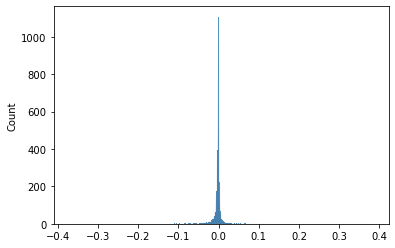

In [19]:
# since there some mutations have mutliple fitness values, let's just use the single mutation fitnesses measured as an array
tmp = []
sum = 0
for index, ijk in enumerate(TMF_total): 
    # ijk[::2] and ijk[1:2] give double mutant alleles ik and jk, respectively
    #assert ijk[0] in SMF
    #assert ijk[1] in SMF
    #assert ijk[::2] in DMF_epsilon
    #assert ijk[1:3] in DMF_epsilon
    i_allele = ijk[0]
    j_allele = ijk[1]
    k_allele = ijk[2]
    if i_allele in SMF_array_single and j_allele in SMF_array_single:
        f_i = SMF_array_single[ i_allele ]
        f_j = SMF_array_single[ j_allele ]

        f_ik = DMF_total[ tuple([i_allele, k_allele]) ]
        f_jk = DMF_total[ tuple([j_allele, k_allele]) ]

        f_k = TMF_fk[ k_allele ]
        f_ij = TMF_fij[ tuple([i_allele,j_allele]) ]
        e_ik = DMF_epsilon[ ijk[::2] ]
        e_jk = DMF_epsilon[ ijk[1:3] ]
        e_ij_k = TMF_total[ ijk ] - (f_ij*f_k)
    
        tmp.append( TMF_adj_epsilon_tau[ijk] - (e_ij_k - e_ik*f_j - e_jk*f_i) )

print(len(tmp))
print(np.nanmean(tmp))
sns.histplot(tmp)

In [32]:
base=10
diff = []
epsilon_raw = []
tau_reported = []
tau_by_hand = []
tau_by_hand_multiplicative = []
tau_by_hand_additive = []
tau_by_hand_additive_multiplicative = []
pairwise_epi_O_minus_E = []

epi_with_scaled_single_mut_fit = [] # a list of 2-tuples, where first element is epistasis factor, second if the single mutant fitness it's scaled by
sum = 0
for index, ijk in enumerate(significant_trigenic):
#for index, ijk in enumerate(TMF_total): 
    # ijk[::2] and ijk[1:2] give double mutant alleles ik and jk, respectively
    #assert ijk[0] in SMF
    #assert ijk[1] in SMF
    #assert ijk[::2] in DMF_epsilon
    #assert ijk[1:3] in DMF_epsilon
    i_allele = ijk[0]
    j_allele = ijk[1]
    k_allele = ijk[2]
    #if i_allele in SMF_costanzo_single and j_allele in SMF_costanzo_single and k_allele in SMF_costanzo_single:
    if i_allele in SMF_costanzo_single and j_allele in SMF_costanzo_single:
        f_i = SMF_costanzo_single[ i_allele ]
        f_j = SMF_costanzo_single[ j_allele ]

        # variables taken from digenic screen
        e_ik = DMF_epsilon[ ijk[::2] ] # 1st and last allele
        e_jk = DMF_epsilon[ ijk[1:3] ] # last 2 alleles
        f_ik = DMF_total[ tuple([i_allele, k_allele]) ]
        f_jk = DMF_total[ tuple([j_allele, k_allele]) ]

        # variables taken from trigenic screen
        f_k = TMF_fk[k_allele]
        f_ij = TMF_fij[ tuple([i_allele,j_allele]) ]
        f_ijk = TMF_total[ijk]

        # aggregate interaction calculated in Kuzmin et al
        e_ij_k = f_ijk - (f_ij*f_k)

        # multiplicative epistasis variables
        e_ik_mult = f_ik/(f_i*f_k)
        e_jk_mult = f_jk/(f_j*f_k)

        denom = f_ij*f_k*e_ik_mult*e_jk_mult
        if denom != 0:
            tau_by_hand_multiplicative.append( (f_ijk/denom) )

            tau_by_hand_additive.append( f_ijk - f_ij - f_ik - f_jk + f_i + f_j + f_k - 1.0)

            tau_by_hand_additive_multiplicative.append( f_ijk - f_i*f_j*f_k - f_ij - f_ik - f_jk + f_i*f_j + f_i*f_k + f_j*f_k )

            diff.append( TMF_adj_epsilon_tau[ijk] - (e_ij_k - e_ik*f_j - e_jk*f_i) )
    
            epsilon_raw.append(TMF_raw_epsilon[ijk])
            tau_reported.append(TMF_adj_epsilon_tau[ijk])
            tau_by_hand.append((e_ij_k - e_ik*f_j - e_jk*f_i))

            pairwise_epi_O_minus_E.extend([f_ik - f_i*f_k, f_jk - f_j*f_k])

            #eij_fk = tuple( [(f_ij - f_i*f_j), f_k] )
            eik_fj = tuple( [(f_ik - f_i*f_k), f_j] )
            ejk_fi = tuple( [(f_jk - f_j*f_k), f_i] )
            epi_with_scaled_single_mut_fit.extend([eik_fj, ejk_fi])
        # multiplicative


"""
fig, axs = plt.subplots(ncols=5, figsize=(20,10))
print(len(diff))
print(len(tau_by_hand_multiplicative))
print(np.nanmean(diff))
sns.histplot(epsilon_raw, ax=axs[0])
sns.histplot(tau_reported, ax=axs[1])
sns.histplot(tau_by_hand, ax=axs[2])
sns.histplot(diff, ax=axs[3])
sns.histplot(tau_by_hand_multiplicative, ax=axs[4])
"""

KeyError: ('hoΔ', 'brn1-9')

-0.04679576814329122 -0.04368907711846017
-0.0329015 -0.031430942999999864
0.052137829756778206 0.048506156409968845
Pearson product-moment correlation               tau_reported  tau_by_hand
tau_reported      1.000000     0.962393
tau_by_hand       0.962393     1.000000


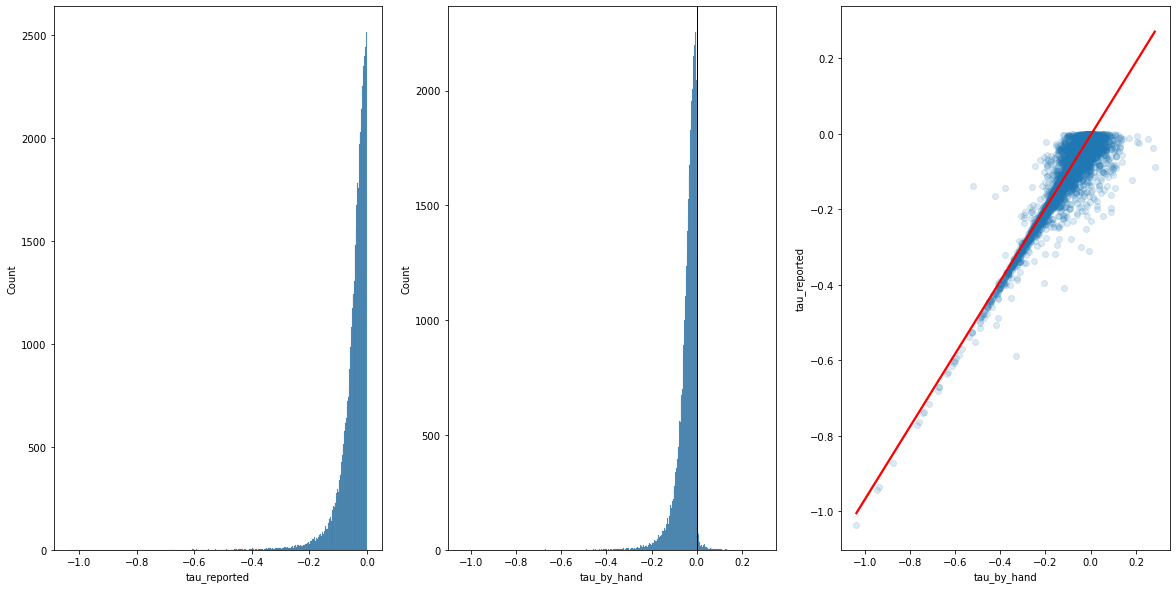

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(20,10))

p = sns.histplot(tau_reported, ax=axs[0])
p.set(xlabel='tau_reported')
p = sns.histplot(tau_by_hand, ax=axs[1])
p.set(xlabel='tau_by_hand')
axs[1].axvline(0.0, color="black", linewidth=1)

p = sns.regplot(x=tau_by_hand,
            y=tau_reported,
            scatter_kws={'alpha':0.15},
            line_kws={'color': 'red'},
            ax=axs[2])
p.set(xlabel='tau_by_hand', ylabel='tau_reported')

print(np.nanmean(tau_reported), np.nanmean(tau_by_hand))
print(np.nanmedian(tau_reported), np.nanmedian(tau_by_hand))
print(np.nanstd(tau_reported), np.nanstd(tau_by_hand))
df = pd.DataFrame(list(zip(tau_reported, tau_by_hand)), columns = ["tau_reported","tau_by_hand"])
print("Pearson product-moment correlation", df.corr(method="pearson"))

In [22]:
print(np.nanmean(tau_reported))
print(np.nanmean(tau_by_hand))
print(np.nanmean(tau_by_hand_multiplicative))
print(np.nanmean(tau_by_hand_additive))

-0.04679576814329122
-0.04368907711846017
0.9629392536073651
-0.025383728312534635


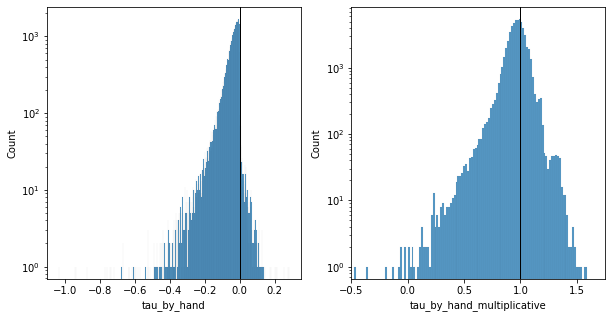

In [23]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(tau_by_hand, bins=800, ax=axs[0])
#axs[0].set_xlim(-0.5,1.75)
axs[0].set_yscale("log")
axs[0].set(xlabel='tau_by_hand')
axs[0].axvline(0.0, color="black", linewidth=1)

sns.histplot(tau_by_hand_multiplicative, bins=800, ax=axs[1])
axs[1].set_xlim(-0.5,1.75)
axs[1].set_yscale("log")
axs[1].set(xlabel='tau_by_hand_multiplicative')
axs[1].axvline(1.0, color="black", linewidth=1)




62530
62530
Pearson product-moment correlation               tau_reported  tau_by_hand
tau_reported       1.00000      0.58574
tau_by_hand        0.58574      1.00000


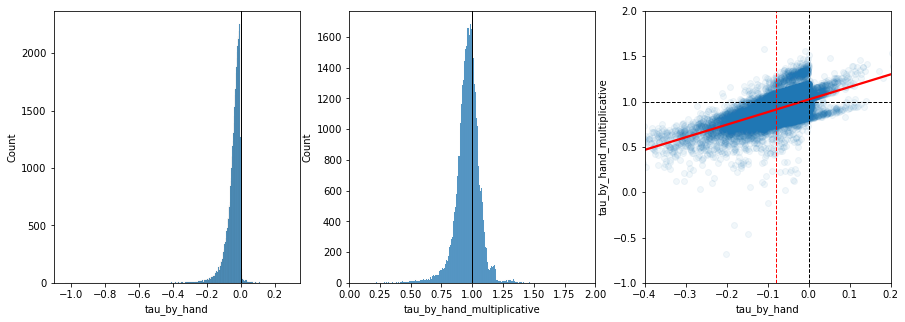

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

p = sns.histplot(tau_by_hand, ax=axs[0])
p.set(xlabel='tau_by_hand')
axs[0].axvline(0.0, color="black", linewidth=1)

sns.histplot(tau_by_hand_multiplicative, ax=axs[1])
axs[1].set_xlim(0,2)
axs[1].axvline(1.0, color="black", linewidth=1)
axs[1].set(xlabel='tau_by_hand_multiplicative')

print(len(tau_by_hand_multiplicative))
print(len(tau_by_hand))
sns.regplot(x=tau_by_hand,
            y=tau_by_hand_multiplicative,
            scatter_kws={'alpha':0.06},
            line_kws={'color': 'red'},
            ax=axs[2])
axs[2].set(xlabel='tau_by_hand', ylabel='tau_by_hand_multiplicative')
axs[2].set_xlim(-0.4,0.2)
axs[2].set_ylim(-1,2)
axs[2].axvline(0, color="black", linewidth=1, linestyle="--")
axs[2].axvline(-0.080001, color="red", linewidth=1, linestyle="--")
axs[2].axhline(1, color="black", linewidth=1, linestyle="--")


-0.080001

df = pd.DataFrame(list(zip(tau_by_hand_multiplicative, tau_by_hand)), columns = ["tau_reported","tau_by_hand"])
print("Pearson product-moment correlation", df.corr(method="pearson"))


In [25]:
print(len(tau_by_hand_multiplicative))
print(np.sum([1 for i in tau_by_hand_multiplicative if i > 1]))
print(np.sum([1 for i in tau_by_hand_multiplicative if i < 1]))
print("###")
print(len(tau_by_hand))
print(np.sum([1 for i in tau_by_hand if i > 0]))
print(np.sum([1 for i in tau_by_hand if i < 0]))

62530
20222
39317
###
62530
1351
58188


In [26]:
x = [True if i > 1 else False for i in tau_by_hand_multiplicative ]
y = [True if i > 0 else False for i in tau_by_hand ]
print( "both positive:", np.sum(np.logical_and(x,y)))

x = [True if i < 1 else False for i in tau_by_hand_multiplicative ]
y = [True if i > 0 else False for i in tau_by_hand ]
print( "multiplicative negative, mixed positive:", np.sum(np.logical_and(x,y)))

x = [True if i > 1 else False for i in tau_by_hand_multiplicative ]
y = [True if i < 0 else False for i in tau_by_hand ]
print( "multiplicative positive, mixed negative:", np.sum(np.logical_and(x,y)))

x = [True if i < 1 else False for i in tau_by_hand_multiplicative ]
y = [True if i < 0 else False for i in tau_by_hand ]
print( "multiplicative negative, mixed negative:", np.sum(np.logical_and(x,y)))

both positive: 843
multiplicative negative, mixed positive: 508
multiplicative positive, mixed negative: 19379
multiplicative negative, mixed negative: 38809


62530
62530
Pearson product-moment correlation               tau_reported  tau_by_hand
tau_reported       1.00000      0.79087
tau_by_hand        0.79087      1.00000


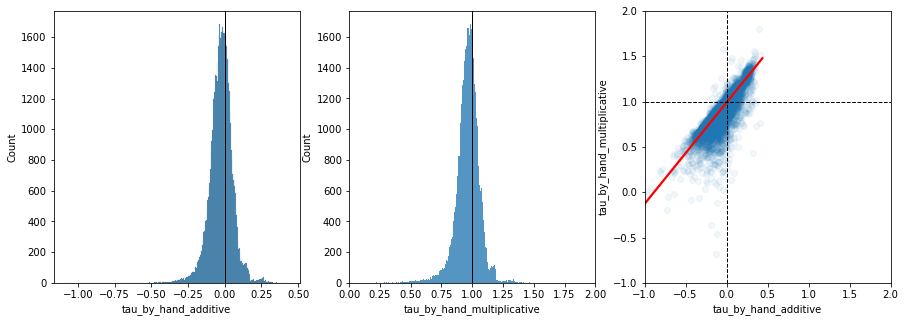

In [27]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

p = sns.histplot(tau_by_hand_additive, ax=axs[0])
p.set(xlabel='tau_by_hand_additive')
axs[0].axvline(0.0, color="black", linewidth=1)

sns.histplot(tau_by_hand_multiplicative, ax=axs[1])
axs[1].set_xlim(0,2)
axs[1].axvline(1.0, color="black", linewidth=1)
axs[1].set(xlabel='tau_by_hand_multiplicative')

print(len(tau_by_hand_multiplicative))
print(len(tau_by_hand_additive))
sns.regplot(x=tau_by_hand_additive,
            y=tau_by_hand_multiplicative,
            scatter_kws={'alpha':0.06},
            line_kws={'color': 'red'},
            ax=axs[2])
axs[2].set(xlabel='tau_by_hand_additive', ylabel='tau_by_hand_multiplicative')
axs[2].set_xlim(-1,2)
axs[2].set_ylim(-1,2)
axs[2].axvline(0, color="black", linewidth=1, linestyle="--")
#axs[2].axvline(-0.080001, color="red", linewidth=1, linestyle="--")
axs[2].axhline(1, color="black", linewidth=1, linestyle="--")



df = pd.DataFrame(list(zip(tau_by_hand_multiplicative, tau_by_hand_additive)), columns = ["tau_reported","tau_by_hand"])
print("Pearson product-moment correlation", df.corr(method="pearson"))


62530
62530
Pearson product-moment correlation               tau_reported  tau_by_hand
tau_reported      1.000000     0.999884
tau_by_hand       0.999884     1.000000


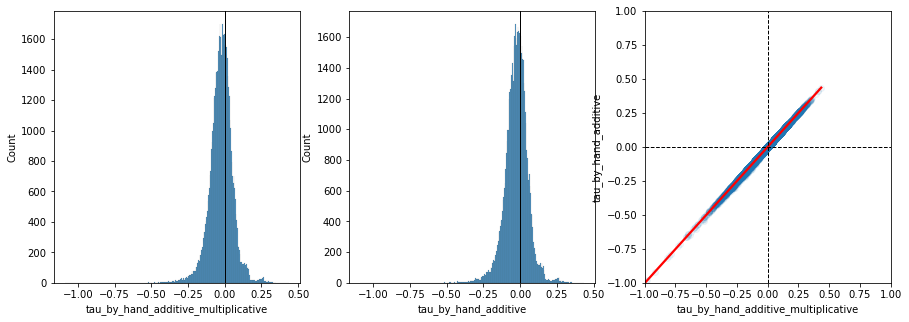

In [28]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

p = sns.histplot(tau_by_hand_additive_multiplicative, ax=axs[0])
p.set(xlabel='tau_by_hand_additive_multiplicative')
axs[0].axvline(0.0, color="black", linewidth=1)

sns.histplot(tau_by_hand_additive, ax=axs[1])
#axs[1].set_xlim(0,2)
axs[1].axvline(0.0, color="black", linewidth=1)
axs[1].set(xlabel='tau_by_hand_additive')

print(len(tau_by_hand_additive))
print(len(tau_by_hand_additive_multiplicative))

sns.regplot(x=tau_by_hand_additive_multiplicative,
            y=tau_by_hand_additive,
            scatter_kws={'alpha':0.06},
            line_kws={'color': 'red'},
            ax=axs[2])
axs[2].set(xlabel='tau_by_hand_additive_multiplicative', ylabel='tau_by_hand_additive')
axs[2].set_xlim(-1,1)
axs[2].set_ylim(-1,1)
axs[2].axvline(0, color="black", linewidth=1, linestyle="--")
#axs[2].axvline(-0.080001, color="red", linewidth=1, linestyle="--")
axs[2].axhline(0, color="black", linewidth=1, linestyle="--")



df = pd.DataFrame(list(zip(tau_by_hand_additive_multiplicative, tau_by_hand_additive)), columns = ["tau_reported","tau_by_hand"])
print("Pearson product-moment correlation", df.corr(method="pearson"))

0.941995541544697
0.004730613243163281


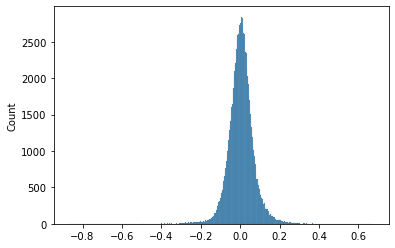

In [29]:
sns.histplot(pairwise_epi_O_minus_E)
print(np.mean([SMF_costanzo_single[i] for i in SMF_costanzo_single]))
print(np.nanmean(pairwise_epi_O_minus_E))


[Text(0.5, 0, 'single mutant fitness scale'),
 Text(0, 0.5, 'pairwise epistasis')]

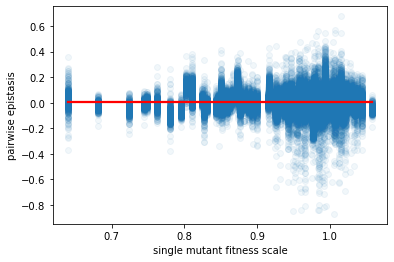

In [30]:

epi = [i[0] for i in epi_with_scaled_single_mut_fit]
smf = [i[1] for i in epi_with_scaled_single_mut_fit]
#print(epi_with_scaled_single_mut_fit[0:3])
#print(epi[0:3])
#print(smf[0:3])

p = sns.regplot(x=smf,
            y=epi,
            scatter_kws={'alpha':0.06},
            line_kws={'color': 'red'})
p.set(xlabel='single mutant fitness scale', ylabel='pairwise epistasis')
#axs[2].set_xlim(-1,1)
#axs[2].set_ylim(-1,1)
#axs[2].axvline(0, color="black", linewidth=1, linestyle="--")
#axs[2].axvline(-0.080001, color="red", linewidth=1, linestyle="--")
#axs[2].axhline(0, color="black", linewidth=1, linestyle="--")



In [31]:
sum=0
for i,t in enumerate(TMF):
    #if i < 10:
    test = [(t[0],t[1]) in epsilon_filtered,  (t[0],t[2]) in epsilon_filtered, (t[1],t[2]) in epsilon_filtered]
    if np.all( test ):
        sum += 1
print(sum, len(TMF))

NameError: name 'TMF' is not defined

In [ ]:
all_alleles = set()
# single (SMF), double (DMF), and triple (TMF) mutant fitness
SMF_costanzo = defaultdict(set)
for i,row in costanzo.iterrows():
    #if i < 100:
    SMF_costanzo[row['query_allele_name']].add(row['query_smf'])
    SMF_costanzo[row['array_allele_name']].add(row['array_smf'])


In [ ]:
x = defaultdict(int)
for s in SMF_costanzo:
     x[len(SMF_costanzo[s])] += 1
x

defaultdict(int,
            {1: 4441,
             3723: 1,
             3717: 1,
             3790: 1,
             3820: 1,
             3634: 1,
             2537: 1,
             3631: 1,
             3625: 1,
             3468: 1,
             3666: 3,
             3702: 2,
             3593: 1,
             3604: 2,
             4152: 3,
             3696: 2,
             3304: 1,
             3375: 1,
             3500: 1,
             2764: 1,
             3665: 1,
             3659: 1,
             3683: 1,
             3687: 2,
             3698: 2,
             3663: 1,
             3697: 1,
             4175: 1,
             3432: 1,
             3677: 2,
             3681: 2,
             3674: 2,
             3418: 1,
             3688: 1,
             3650: 1,
             4492: 1,
             3578: 1,
             3706: 2,
             3684: 1,
             3389: 1,
             3740: 2,
             3701: 2,
             3741: 2,
             3618: 1,
             41

In [ ]:
len(SMF_costanzo)

5647

In [ ]:
costanzo

,query_strain_id,query_allele_name,array_strain_id,array_allele_name,Arraytype_Temp,genetic_interaction_e,pval,query_smf,array_smf,dbl_mutant_fitness,dbl_mutant_fitness_std
0,YAL002W_sn273,vps8,YBL001C_dma94,ecm15,DMA30,0.1226,0.002185,0.7552,1.0112,0.8862,0.0327
1,YAL002W_sn273,vps8,YBL003C_dma93,hta2,DMA30,0.0269,0.242000,0.7552,1.0005,0.7825,0.0286
2,YAL002W_sn273,vps8,YBL005W_dma92,pdr3,DMA30,-0.0228,0.297900,0.7552,1.0248,0.7512,0.0343
3,YAL002W_sn273,vps8,YBL007C_dma91,sla1,DMA30,-0.0535,0.166300,0.7552,0.8230,0.5681,0.0525
4,YAL002W_sn273,vps8,YBL008W_dma90,hir1,DMA30,0.0532,0.071490,0.7552,0.9370,0.7608,0.0241
...,...,...,...,...,...,...,...,...,...,...,...
601685,YPR180W_tsq2481,aos1-5005,YPL228W_tsa420,cet1-15,TSA26,0.0024,0.485900,NaN,0.8044,0.8068,0.0393
601686,YPR180W_tsq2481,aos1-5005,YPL233W_tsa450,nsl1-5,TSA26,-0.0379,0.037030,NaN,0.8471,0.8092,0.0163
601687,YPR180W_tsq2481,aos1-5005,YPL233W_tsa452,nsl1-6,TSA26,-0.0228,0.274900,NaN,0.9983,0.9755,0.0300
601688,YPR180W_tsq2481,aos1-5005,YPL235W_tsa1202,rvb2-5001,TSA26,-0.0322,0.006225,NaN,0.9283,0.8961,0.0099


SyntaxError: invalid syntax (<ipython-input-128-5d317a638763>, line 2)